# Rotations and Boosts with Quaternions

## A Brief History of Quaternions and Lorentz Transformations

Quaternions ($C \ell_{0, 2}(\mathcal{R})$) were known to have four degrees of freedom and do rotations in three spatial dimensions in the eighteen forties. Special relativity was created by Einstein in 1905. His math professor Minkowski recognized the Lorentz transformation as a rotation in a four dimensional vector space in 1908. It would appear that quaternions were tailor-made to do the work of Lorentz transformations. Early on, two people did give it a try (Conway (1911) and Silberstein (1912)). What they both realized was that the triple product used for rotations could only work for complex-valued quaternions $C \ell_{1, 2}(\mathcal{R})$:
$$B \rightarrow R' = u R u^*, \quad |u|=1$$
This same technique is featured in "Gravitation" by Misner, Thorne, and Wheeler, Chapter 41 "Spinors". It is important to note that complex-valued quaternions are not a division algebra. 

I suspect many physicists do not care about the details of the math being used - that is for mathematicians to understand. That flies in the face of how central math is to physics. To my eye, when physics is done right, there is no difference between math and physics. This is why for me deciding what math to use is of ultimate importance. Physical laws are known to be reversible. For that reason, the most basic math operations of all - addition and multiplication - must be reversible. If that is not the case, then there will be math operations that are not consistent with the reversibility seen in physics. This is not a guiding principle in mainstream physics, but it is for me.

Special relativity is _special_ in the sense that it applies exclusively to inertial observers. General relativity is _general_ in the sense that it applies to all observers, the most famous case being those observers in a gravitational field. Non-inertial reference frames are common since all that is needed is an ordinary rotation. A way of thinking about the difference is that special relativity involves a system of global transformations while general relativity is about local transformations.

The fans of quantum mechanics will point out that quaternions in quantum mechanics have been a failure. For a reacent discussion on this subject by professionals, see the blog by Scott Aaronson, [Why are amplitudes complex?](https://www.scottaaronson.com/blog/?p=4021) where he wrote that quaternion quantum mechanics was a **flaming garbage fire**. If you want to know why his critique fails, just notice the trace of the matrices $U$ and $V$ used to claim quaternion quantum mechanics allows for superluminal signaling are *complex-valued*, so they are not observerable operators as presumed in the text. Since the operators are not observable, the analysis is not relevant to people making measurements.

I agree that the way Stephen Adler does quaternion quantum mechanics is technically flawed. I have made limited progress with something different, quaternion series quantum mechanics, where a quaternion series is a semi-group (has more than one identity) with inverses. It remains an open question if I can fill in each essential aspect of quantum mechanics using quaternion series.

## A Real-Valued Quaternion Lorentz Boost

It was some time in 2010 that I came up with a way to do only Lorentz boosts using a function that was a triple triple quaternions like so:
$$B \rightarrow B' = h B h^* + \frac{1}{2} ((h h B)^* - (h^* h^* B)^*)$$
The triple triple quaternion function was found through a simple trial and error process to generate the expected boost by hyperbolic sines and cosines ($h = (\cosh(\alpha), I \sinh(\alpha))$. This worked to generate both pure boosts and boosts with rotations. I recently was informed that Dr. M. Kharinov has independently found this very function for doing boosts which he presented at the Polynomial Computer Algebra 2019 meeting held in St. Petersburg, Russia.

It was another three years before I noticed that there was another kind of quaternion parameter _h_ that could be used, namely those where the first term was not $\cosh(\alpha) \geq 1$, but was equal to zero. For these quaternions, the second and third terms of the triple triple cancel leaving only this expression:
$$B \rightarrow B' = h B h^* $$
This is *precisely* the same form Rodrigues found for doing 3D spatial rotations so many years ago. It is not however the same domain: the first term can be non-zero so long as the norm is equal to one. I did not feel a need to do a detailed analysis of this case since an infinite number of values could be used for $h=(0, a, b, c)$, so my gut feeling was all possible rotations had to be possible.

If one can do all possible boosts and rotations using the triple triple quaternion function, then it would appear that all Lorentz transformations can be achieved with this function. Note a key technical issue: my goal is not to find exclusively global transformations as demanded by special relativity. Instead, I hope to find local transformations, ones that can depend explicitly on the values of $B$.

## The Problem with Rotations and Boosts

Two people with Ph.D.'s in physics (Dr. M. Kharinov and Purple Penguin, a commenter on YouTube) have looked at this function and strongly disagree with my assessment. Their logic is both simple and persuasive. There are three degrees of freedom for rotations and three degrees of freedom for boosts. Since rotations are not boosts, that means one must have at a minimum of six degrees of freedom. The triple triple quaternion function only has one quaternion with at most four degrees of freedom. That is not enough for the task at hand. Nothing more needs to be said.

Purple Penguin cited a transformation that cannot be achieved using a rotation around the $z$ axis using the triple triple quaternion function
$$ B = (t, x, y, z) \rightarrow B' = (t, -y, x, z) $$
He was even able to write out a proof in the comments section of YouTube. That proof is not reproduced here, but it is solid: there is no value of the quaternion parameter $h$ that will do a rotation around the $z$ axis like that shown above.

## The $100 1-Way Wager

I have worked with quaternions as a number since 1997. Numbers in and of themselves are not viewed as a form of higher math. Numbers are grains of sand with little structure while the deep actions happen in the ocean of abstract mathematics. Little structure is not the same as no structure. Each time I have tried to apply quaternions to a problem in physics, eventually a solution was found. With the entire number system open, I was confident that a transformation to $B' = (t, -y, x, z)$ was necessarily possible even if I didn't know any details at the time. I therefore made a 1-way wager, that I could find a parameter $h$ for the triple triple quaternion function that could do that specific transformation. If I failed at such a task, I would donate \$100 to a charity of Purple Penguin's choice (I suggested the American Diabetes Association which he agreed to). Money can be a motivator, and I would have to create this notebook and video any answer to address the wager, win or lose.

## Quickly Try and Fail in an Interesting Way

As soon as I wrote down the \$100 1-way wager, I knew what I would try first: every possible rotation around the _z&nbsp;_ axis. There are only 4 of these, $h=(0,\pm\frac{1}{\sqrt{2}}, \pm\frac{1}{\sqrt{2}}, 0)$. My practice is to do a simple calculation first, see what one learns later. 

Technical sidebar:
I should point out I am using a variety of conjugate functions: the conjugate does as expected, but the first conjugate $(^{*1})$ will flip all the signs except the first spatial term. The second conjugate $(^{*2})$ does a similar thing, flipping all signs but the second spatial term. flip_signs() is no different from multiplying by negative one. Gauss was the first to use the first and second conjugate in an unpublished notebook although he did not reference them in this way.

Load the needed libraries.

In [1]:
%%capture
%matplotlib inline
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math
import unittest

# To get equations the look like, well, equations, use the following.
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from IPython.display import display

# Tools for manipulating quaternions written by D. Sweetser.
from QH import QH;

from IPython.core.display import display, HTML, Math, Latex
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
hpp = QH([0, 1/sp.sqrt(2), 1/sp.sqrt(2), 0])
hnn = hpp.flip_signs()
hpn = hpp.conj(1)
hnp = hpp.conj(2)

hpp.print_state("hpp")
hnn.print_state("hnn")
hpn.print_state("hpn")
hnp.print_state("hnp")

hpp
(0, sqrt(2)/2, sqrt(2)/2, 0) 

hnn
(0, -sqrt(2)/2, -sqrt(2)/2, 0) 

hpn
(0, sqrt(2)/2, -sqrt(2)/2, 0) 

hnp
(0, -sqrt(2)/2, sqrt(2)/2, 0) 



In [3]:
t, x, y, z = sp.symbols("t x y z")
txyz = QH([t, x, y, z])
txyz_hpp = txyz.rotation_and_or_boost(hpp).simple_q()
txyz_hnn = txyz.rotation_and_or_boost(hnn).simple_q()
txyz_hpn = txyz.rotation_and_or_boost(hpn).simple_q()
txyz_hnp = txyz.rotation_and_or_boost(hnp).simple_q()

txyz_hpp.print_state("txyz_hpp")
txyz_hnn.print_state("txyz_hnn")
txyz_hpn.print_state("txyz_hpn")
txyz_hnp.print_state("txyz_hnp")

txyz_hpp
(t, y, x, -z) 

txyz_hnn
(t, y, x, -z) 

txyz_hpn
(t, -y, -x, -z) 

txyz_hnp
(t, -y, -x, -z) 



Even though 4 parameter $h$ were used, the conjugates return identical results. Neither of these two are the rotation desired. 

Generalize the problem by looking at all 8 possible signs for $y$, $x$, and $z$:

| # | pos. 0  | pos. 1 | pos. 2  | pos. 3 |
| --- | ----- | ------ | ------- | ------ |
| 1 | t |  y |  x |  z |
| 2 | t |  y |  x | -z |
| 3 | t | -y |  x |  z |
| 4 | t | -y |  x | -z |
| 5 | t |  y | -x |  z |
| 6 | t |  y | -x | -z |
| 7 | t | -y | -x |  z |
| 8 | t | -y | -x | -z |

The goal is to generate #3, but there is nothing particularly special about that one. A complete solution must generate all eight. The initial guess generated #2 and #8. 

What sort of different function would be able to generate all eight cases? I wrote a function conj_q() that can apply all three conjugates and multiply by minus one. The ability to use involutive automorphisms (a fancy name for conjugates) and multiplying by a minus sign means all eight cases can be generated by also applying conj_q() in the right way for one of the rotations around the $z$ axis.

In [4]:
txyz_hpp.conj_q(QH([True, True, True, False])).print_state("#1 hpp * *1 *2")
txyz_hpp.conj_q(QH([False, False, False, False])).print_state("#2 hpp")
txyz_hpp.conj_q(QH([True, False, True, True])).print_state("#3 hpp * *2 *-1")
txyz_hpp.conj_q(QH([False, True, False, True])).print_state("#4 hpp *1 *-1")
txyz_hpp.conj_q(QH([True, True, False, True])).print_state("#5 hpp * *1 *-1")
txyz_hpp.conj_q(QH([False, False, True, True])).print_state("#6 hpp *2 *-1")
txyz_hpp.conj_q(QH([True, False, False, False])).print_state("#7 hpp *")
txyz_hpp.conj_q(QH([False, True, True, False])).print_state("#8 hpp *1 *2")

#1 hpp * *1 *2
(t, y, x, z) 

#2 hpp
(t, y, x, -z) 

#3 hpp * *2 *-1
(t, -y, x, z) 

#4 hpp *1 *-1
(t, -y, x, -z) 

#5 hpp * *1 *-1
(t, y, -x, z) 

#6 hpp *2 *-1
(t, y, -x, -z) 

#7 hpp *
(t, -y, -x, z) 

#8 hpp *1 *2
(t, -y, -x, -z) 



This is **not an answer** to the \$100 1-way wager since it changes the function used (the triple triple triple conjugate quaternion function perhaps?). Notice that only one of the eight possible cases has no conjugates at all (\#2). All the others are variations on the simplest case.

There are another eight cases for improper rotations, ones were time flip signs. These can be found simply enough: just multiply each of these eight cases by minus one.

In [5]:
txyz_hpp.conj_q(QH([True, True, True, True])).print_state("improper #8 hpp * *1 *2 *-1")
print("...and the others")

improper #8 hpp * *1 *2 *-1
(-t, -y, -x, -z) 

...and the others


This may appear to some as just a mathematical game. The conjugate operator does play a leading role in quantum mechanics, albeit in a different context (quaternion series not quaternions as a number). One use of this section is there are now eight tests to pass for any solution to the \$100 1-way wager.

## Ask the Mathematician

Pretend we have a mathematician who has no knowledge or much interest in physics. Tell him we have two distinct quaternions, $B = (t, x, y, z)$ and $B' = (t', x', y', z')$. We wish to analyze what happens when both of these are squared, and additionally the first terms of the square are identical:

$$ \begin{aligned} B^2 & = (t^2 - (x^2 + y^2 + z^2), 2 t x, 2 t y, 2 t z) \\ 
B'^2 & = (t'^2 - (x'^2 + y'^2 + z'^2), 2 t' x', 2 t' y', 2 t' z') \\  
& = (t^2 - (x^2 + y^2 + z^2), 2 t' x', 2 t' y', 2 t' z') \end{aligned} $$ 

Ask the mathematician how many degrees of freedom are involve in transforming $B$ to $B'$ and he would tell you 3 because there is but one constraint.

Now we ask the mathematician to repeat the exercise, but this time we will start with the 4-vectors $B^\mu$ and $B'^\mu$. The mathematician being a mathematician refuses. A 4-vector can be added to another 4-vector or multiplied by a scalar. A 4-vector cannot be squared. There is no operation that I am aware of (and I am not a professional mathematician or physicist) that can generate both the scalar or first term of the quaternion squared and the other three. Nor am I aware of an official name for the other three. In the context of quaternion algebra, I have chosen to call them space-times-time.

If one supplies a metric tensor, a rank 2 tensor, then one can contract the two 4-vectors and create a rank 0 tensor or scalar. The mathematician would point out that one has  freedom to choose what ends up in the scalar value. Write out the most general metric tensor:

$$ g_{\mu \nu} = \begin{vmatrix}
g_{00} & g_{01} & g_{02} & g_{03} \\
g_{10} & g_{11} & g_{12} & g_{13} \\
g_{20} & g_{21} & g_{22} & g_{23} \\
g_{30} & g_{31} & g_{32} & g_{33}
\end{vmatrix} $$

Contract the two 4 vectors:

$$\begin{aligned} g_{\mu \nu} B^\mu B'^\nu & = g_{00} t t'+ g_{11} x x' + g_{22} y y' + g_{33} z z'\\ 
& + g_{10} x t' + g_{01} t x' + g_{23} y z' + g_{32} z y' \\
& + g_{20} y t' + g_{02} t y' + g_{31} z x' + g_{13} x z'\\ 
& + g_{30} z t' + g_{03} t z' + g_{12} x y' + g_{21} y x' \end{aligned} $$

This is all possible second-order combinations of $(t, x, y, z)$ and $(t', x', y', z')$. One can generate a quaternion product which has casual similarities to this:

$$\begin{aligned} G & = (g_0 t, g_1 x, g_2 y, g_3 z) \\ G' & = (g_0 t', g_1 x', g_2 y', g_3 z') \\ G G' &= \begin{pmatrix}g_0 g_0 t t' - g_1 g_1 x x' - g_2 g_2 y y' - g_3 g_3 z z',\\ + g_1 g_0 x t' + g_0 g_1 t x' + g_2 g_3 y z' - g_3 g_2 z y', \\ + g_2 g_0 y t' + g_0 g_2 t y' + g_3 g_1 z x' - g_1 g_3 x z',\\ + g_3 g_0 z t' + g_0 g_3 t z' + g_1 g_2 x y' - g_2 g_1 y x' \end{pmatrix} \end{aligned} $$

While this has the same set of combinations, the results are not all packed into one term but get distributed over four terms. The quaternion product is an automorphism because one starts with two terms that have the structure of quaternions and the result is also a quaternion.

It was Gauss who came across both of these ideas for combining 4 numbers. I am not familiar with the history, other than the work on differential geometry was carried on by his student, Riemann. That work was further developed by others and became the basis of general relativity. All field theories today are written using the rules of tensor calculus and differential geometry, including the standard model.

Gauss also did the [first work on quaternions](https://www.dropbox.com/s/kz2o1gljiin6e3h/Gauss_quaternion_pages.pdf?dl=0), which was unpublished and unnoticed for many years. Quaternions are used to do rotations in 3D space and unitary quaternions serve as the gauge symmetry of the weak force.

There is a choice that should be consciously made on how to handle 4 numbers, either as 4-vectors and tensor calculus or quaternions. My observation is that people's investment in tensor calculus is far too deep to ever challenge it. It is amusing to speculate if the reverse had happened: that the work on metrics and differential geometry was hidden in a notebook but the work on quaternions was published and pushed forward by Riemann.

## Relationships Between 6 Ratios

One can do three rotations and/or three boosts. That makes six separate degrees of freedom. Case closed.

All six of these measurements are ratios. Write them out in a Cartesian representation:

$$\begin{aligned} V_x &= \frac{d x}{d t} \\ V_y &= \frac{d y}{d t} \\ V_z &= \frac{d z}{d t} \\ \tan(d\theta_{xy}) &= \frac{d x}{d y} = \frac{V_x}{V_y}\\ \tan(d\theta_{zx}) &= \frac{d z}{d x} = \frac{V_z}{V_x}\\ \tan(d\theta_{yz}) &= \frac{d y}{d z} = \frac{V_y}{V_z} \end{aligned} $$

Differential angles are ratios of differential distances. The ratio of two velocities is also a ratio of distances. This observations suggests one should be suspicious of claims these variables are independent of each other. Representations of the Lorentz group are invariably written with these six ratios treated as independent variables. Yet I hope the reader will be open to alternatives that make do with less because the ratio of a ratio can be another ratio.

## The Case at Hand

The goal for the triple triple quaternion function is to find an expression for $h$ that will use do the transformation $B=(t, x, y, z) \rightarrow B' = (t, -y, x, z)$. It has already been postulated that the first term of $h$ has to be zero. In that case, two of the terms in the triple triple cancel, leaving only: $B \rightarrow B' = h B h^*$.

Quaternions are simply numbers, that is the way to think about them. If I say I have three numbers that are all multiplied together and two of them are known, no one would be impressed if I found the third number. That is precisely what is going on here: $B$ and $B'$ are known, so the exercise is to find the third number, the quaternion parameter $h$. Multiply out the triple product.

In [6]:
hx, hy, hz = sp.symbols("hx hy hz")
h = QH([0, hx, hy, hz])
B = QH([t, x, y, z])
Bp = QH([t, -y, x, z])
hBh = h.product(B.product(h.conj())).simple_q()
hBh.display_q("h B h*")

h B h*


The way sympy's solve() works is to feed it an expression that equals zero. In this case, that would be $hBh -B'$ as an array.

In [7]:
hBh.t - t

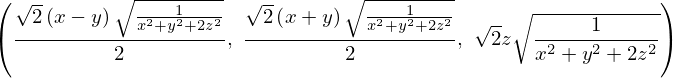

In [8]:
hBhBp = hBh.dif(Bp)
sp.simplify(sp.solve([hBhBp.t, hBhBp.x, hBhBp.y, hBhBp.z], (hx, hy, hz)))[1]

This is the answer to the \$100 1-way wager (technical note: I suppressed the conjugate which is also an answer but of limited interest). I would write it in a slightly better way like so:

$$h = \left(0, \frac{x - y}{\sqrt{2 x^2 + 2 y^2 + 4 z^2}} , \frac{x + y}{\sqrt{2 x^2 + 2 y^2 + 4 z^2}} , \frac{2 z}{\sqrt{2 x^2 + 2 y^2 + 4 z^2}} \right) $$

Demonstrate this answer works as expected in the triple triple quaternion product:

In [9]:
hxhyhz = sp.simplify(sp.solve([hBhBp.t, hBhBp.x, hBhBp.y, hBhBp.z], (hx, hy, hz)))[1]
h_solution = QH([0, hxhyhz[0], hxhyhz[1], hxhyhz[2]])
B.rotation_and_or_boost(h_solution).simple_q().print_state("B rotated by h")

B rotated by h
(t, -y, x, z) 



The criteria for passing the \$100 1-way wager was elevated to include getting eight solutions. 

In [10]:
Bppp = QH([t, y, x, z])
Bppn = Bppp.conj().conj(1).conj(2)
Bnpp = Bppp.conj(1).flip_signs()
Bnpn = Bppp.conj().conj(2).flip_signs()
Bpnp = Bppp.conj(2).flip_signs()
Bpnn = Bppp.conj().conj(1).flip_signs()
Bnnp = Bppp.conj(1).conj(2)
Bnnn = Bppp.conj()
the_Bs = [Bppp, Bppn, Bnpp, Bnpn, Bpnp, Bpnn, Bnnp, Bnnn]

Bppp.print_state("Bppp")
Bppn.print_state("Bppn")
Bnpp.print_state("Bnpp")
Bnpn.print_state("Bnpn")
Bpnp.print_state("Bpnp")
Bpnn.print_state("Bpnn")
Bnnp.print_state("Bnnp")
Bnnn.print_state("Bnnn")

Bppp
(t, y, x, z) 

Bppn
(t, y, x, -z) 

Bnpp
(t, -y, x, z) 

Bnpn
(t, -y, x, -z) 

Bpnp
(t, y, -x, z) 

Bpnn
(t, y, -x, -z) 

Bnnp
(t, -y, -x, z) 

Bnnn
(t, -y, -x, -z) 



# 1 solution
(t, y, x, z) 



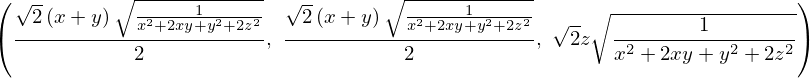

# 2 solution
(t, y, x, -z) 



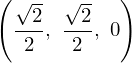

# 3 solution
(t, -y, x, z) 



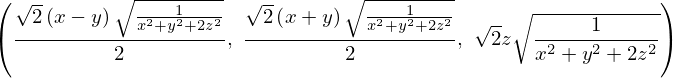

# 4 solution
(t, -y, x, -z) 



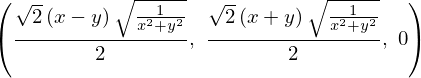

# 5 solution
(t, y, -x, z) 



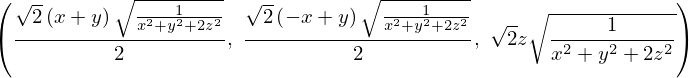

# 6 solution
(t, y, -x, -z) 



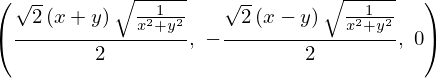

# 7 solution
(t, -y, -x, z) 



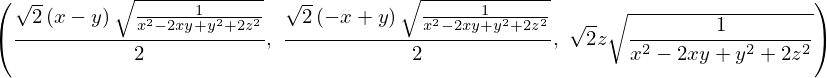

# 8 solution
(t, -y, -x, -z) 



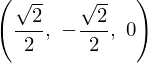

In [11]:
for i, the_B in enumerate(the_Bs, start=1):
    B_eq = hBh.dif(the_B)
    the_B.print_state("# {} solution".format(i))
    sp.simplify(sp.solve([B_eq.t, B_eq.x, B_eq.y, B_eq.z], (hx, hy, hz)))[1]

Two solutions are constant or global, #2 and #8 as expected from the work in the "Quickly Try..." section. The others are all local in the sense they depend on the value of $B$ to be transformed. I was so used to a static solution - Lorentz transformations only depend on the angle of rotations or a velocity - it seamed like that is the only thing that is allowed.

In the standard approach to doing Lorentz transformations, there is already an interplay between the member of the Lorentz group and what it acts upon which is not often discussed. Take a boost along the $x$ axis: 

$$\Lambda = \begin{bmatrix} \gamma & -\gamma \beta & 0 & 0 \\
-\gamma \beta & \gamma & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 
\end{bmatrix} $$

It is probably a common reaction to consider this to be a pure boost along the $x$ axis. It certainly is a pure boost for a 4-vector of the form $B^\mu = (a, b, 0, 0)$. If the final two slots are not zero, then boosts of different sizes will rotate the 4-vector in 3D space. This happens because while those non-zero $y$ and $z$ terms remain the same from the boost, the $x$ values change, so the ratios of $x$ to $y$ and $x$ to $z$ vary.

## Rotations and Boosts Using One Quaternion

I wrote earlier: "Quaternions are simply numbers, that is the way to think about them." If that is the case, than the triple triple quaternion product looks baroque. A minimalist would propose: $$B \rightarrow B' = h B \\ \rm{where \;scalar}(B^2) = \rm{scalar}(B'^2)$$ Instead of solving four equations, the parameter $h$ is found through direct calculation: $h = B' * B^{-1}$. Find the first one.

hppp


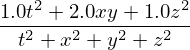

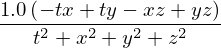

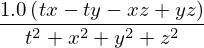

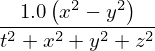

Bppp rotation
(1.0*t, 1.0*y, 1.0*x, 1.0*z) 



In [12]:
B = QH([t, x, y, z])
hppp = Bppp.product(B.inverse()).simple_q()
hppp.display_q("hppp")
hppp.product(B).simple_q().print_state("Bppp rotation")

One of the first thing one ever learns about quaternions is the triple product rule for doing rotations invented by Rodrigues so long ago. While that approach works, it is not necessary. Further, it should be clear that the one quaternion approach would work if $B'$ involved a boost.

It should be emphasized that this quaternion approach does not grant new powers that are not already there in the standard approach to the Lorentz group. The focus of textbook presentations of the Lorentz group are on the global transformations of special relativity. The Lorentz group being infinite has quite a number of options. There are local (depending on $t$, $x$, $y$, $z$) solutions that accomplish the very same feat as shown with quaternion. The same terms are used arranged slightly differently for $B'^\mu = \Lambda^\mu\,_\nu B^\nu$.

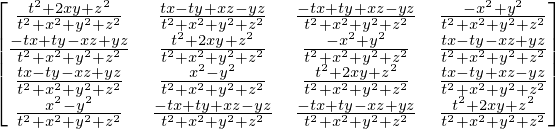

In [13]:
v_txyz = sp.Matrix([t,x,y,z])
n = t**2 + x**2 + y**2 + z**2
Lrot = sp.Matrix([[(t**2 + 2 * x * y + z**2)/n, (t * x - t * y + x * z - y * z)/n, (-t * x + t * y + x * z - y * z)/n, (-x**2 + y**2)/n],
                  [(-t * x + t * y - x * z + y * z)/n, (t**2 + 2 * x * y + z**2)/n, (-x**2 + y**2)/n, (t * x - t * y - x * z + y * z)/n],
                  [(t * x - t * y - x * z + y * z)/n, (x**2 - y**2)/n, (t**2 + 2 * x * y + z**2)/n, (t * x - t * y + x * z - y * z)/n],
                  [(x**2 - y**2)/n, (-t * x + t * y + x * z - y * z)/n, (-t * x + t * y - x * z + y * z)/n, (t**2 + 2 * x * y + z**2)/n]])
display(Lrot)

Notice how each term on the diagonal is identical and the off-diagonal terms are anti-symmetric. This particular Lorentz tensor $\Lambda^\mu\,_\nu$ is in the _precise form_ of the real 4x4 matrix representation of a quaternion! That was a pleasant surprise to me. Prove this Lorentz tensor completes the task at hand.

In [14]:
sp.simplify(Lrot * v_txyz)

This tensor approach does not use angles or boosts. None of these answers are going to be simple global solutions. All answers will be local, depending on the values of $t$, $x$, $y$, and $z$. It is interesting that the one quaternion approach forces the tensor technique to be identical.

## The Outcome of the \$100 1-Way Wager

I will be asking Dr. Kharinov and Purple Penguin for their response to this notebook. If they allow, I will post their reply as they wrote it in this repository. Until then, I will let this notebook speak for itself.